In [99]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import joblib
import tensorflow as tf

In [100]:
# Dataset

data = {'Hours_Studied': [2, 4, 1, 3, 5, 8, 6, 7, 9, 5],'Hours_Slept': 
    [8, 7, 6, 7, 6, 5, 5, 4, 6, 7],'Exam_Score': [70, 75, 60, 78, 82, 90, 85, 88, 95, 80]}
df = pd.DataFrame(data)


In [101]:
X = df[['Hours_Studied','Hours_Slept']]
y = df['Exam_Score']

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
oculta1 = tf.keras.layers.Dense(units=3,input_shape=[2])
oculta2 = tf.keras.layers.Dense(units=3)
salida  = tf.keras.layers.Dense(units=1)
modelo  = tf.keras.Sequential([oculta1,oculta2,salida])

c:\Users\FRANK\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [105]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.1),loss='mean_squared_error')

In [106]:
print('Comenzando entrenamiento')
historial = modelo.fit(X_train,y_train,epochs=1000,verbose=False)
print('Modelo entrenado')

Comenzando entrenamiento
Modelo entrenado


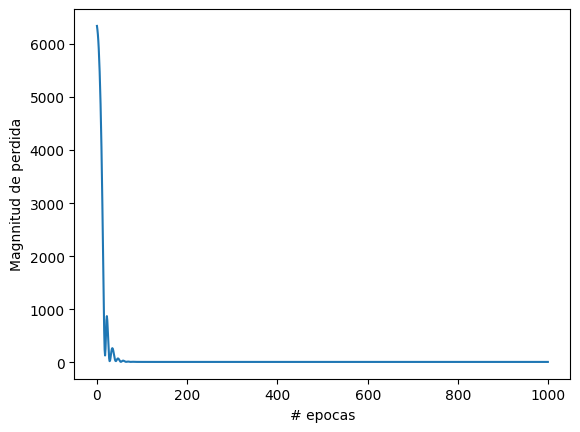

In [107]:
plt.xlabel('# epocas')
plt.ylabel('Magnnitud de perdida')
plt.plot(historial.history['loss'])

In [128]:
print('Vamos a hacer una predicción')
nuevo_dato = np.array([[2,8]]) # 0 (Estudio) | 0 (Sueño)
nuevo_dato_escalado = scaler.transform(nuevo_dato)
resultado = modelo.predict(nuevo_dato_escalado)
print('El resultado es ' + str(resultado[0][0]) + ' Exam_score')  

Vamos a hacer una predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
El resultado es 70.47769 Exam_score


c:\Users\FRANK\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
